### Team 24- Question 3


### Import statements 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.svm import SVC

In [2]:
import os
os.getcwd()
os.chdir('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets')

### Class and function definitions

In [3]:
class Perceptron:
    
    def __init__(self, eta):
        self.eta = eta
        
    def f(self, s, beta = 100):
        return 1/(1+np.exp(-beta*s))
        
    def one_epoch(self, X, Y):
        w_old = self.w.copy()

        for t in range(X.shape[0]):
            xt = X[t, :]
            yt = Y[t]
            if yt*(np.dot(w_old, xt)) <= 0:
                w_new = w_old + self.eta*yt*xt 
            else:
                w_new = w_old
            w_old = w_new
        self.w = w_new
    
    def line(self, w, X):
        x = np.linspace(np.min(X[:, 1])-1 , np.max(X[:, 1])+1, 50)
        c = -w[0]/w[-1]
        m = -w[1]/w[-1]
        y = m*x + c
        return x,y 

    def predict(self, w, X):   
        Y_hat = np.zeros(X.shape[0])
        class_1 = np.argwhere(np.dot(X, w) >= 0)
        class_0 = np.argwhere(np.dot(X, w) < 0)
        Y_hat[class_1] = 1
        Y_hat[class_0] = -1
        return Y_hat   
        
    def accuracy(self, Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere(Y_true==Y_pred))
        N  = Y_true.shape[0]
        return tp/N
   
    def train(self, X, Y, max_iter=1000):
        
        epoch = 0
        while epoch<max_iter:
            epoch += 1
            if epoch == 1:
                self.w =np.ones(X.shape[1])
                error_old = -10
            else:
                error_old = error_new
            self.one_epoch(X,Y)
            
            Y_hat = self.predict(self.w, X)
            error_new = 1 - self.accuracy(Y, Y_hat)
            print('Epoch: {0}, Error: {1}'.format(epoch, error_new))
            
            if error_new==0.0:
                print('Converged!!')
                break
        
            if abs(error_old-error_new)/(error_new) < 0.0001 and error_new < 0.01:
                print('Converged!!')
                break
            
        if epoch == max_iter:
            print('Did not converge!')             

In [4]:
def accuracy(Y_true, Y_pred):
    # Returns the accuracy of predicted classes
    # Inputs:
    #     Y_true -----> True class labels
    #     Y_pred -----> Predicted class labels
    # Returns:
    #     tp/N -------> Accuracy of predicted class labels 

        tp = len(np.argwhere((Y_true)==(Y_pred)))
        N  = Y_true.shape[0]
        return tp/N

## Dataset 1


In [5]:
data = pd.read_csv('Dataset_1/Dataset_1_Team_24.csv')
data.head()

,# x_1,x_2,Class_label
0,251.290678,-307.404235,1
1,313.403318,-270.377457,1
2,-302.947861,395.402585,0
3,270.918576,-318.853878,1
4,-286.806780,392.455625,0


In [6]:
data.columns = ['X1','X2', 'Y']

In [7]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

### Visualising the data

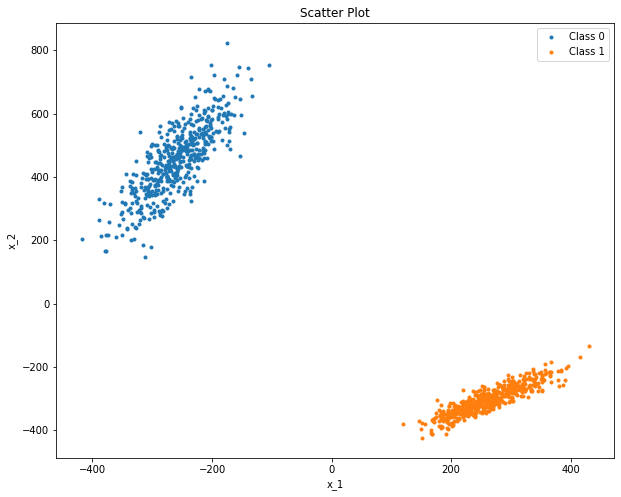

In [8]:
classes = np.unique(Y)

plt.figure(figsize = [10,8])
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')


plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel

In [9]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [10]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.0
Converged!!


In [11]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [12]:
accuracy_linear_train1 = accuracy(Y_train,Y_train_hat_lin)
accuracy_linear_test1 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_linear_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_linear_test1))

Train Prediction Accuracy: 1.0
Test Prediction Accuracy: 1.0


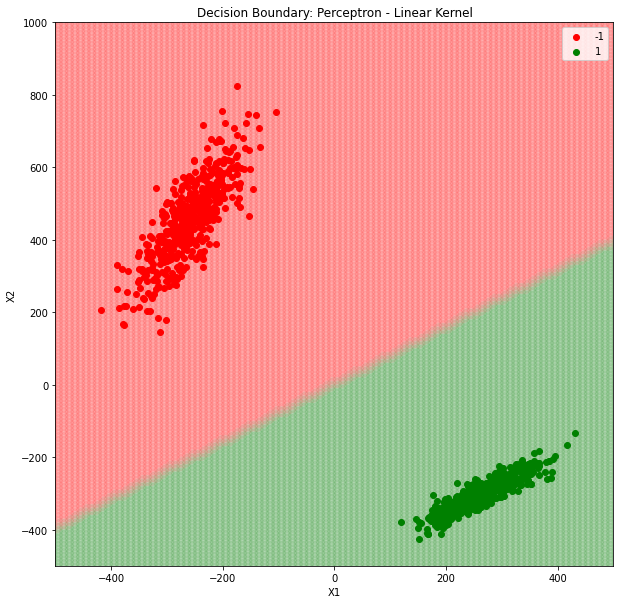

In [13]:
x_l, y_l = nn.line(nn.w, X_train_a)

# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot = np.hstack((np.ones(x_plot.shape[0]).reshape(-1,1), x_plot))

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_plot).astype(int)

plt.scatter(x_plot[:,1], x_plot[:,2], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')

for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Linear Kernel")

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Polynomial Kernel

In [14]:
# Generating the polynomial features (Degree =2)
X = data.iloc[:,:2]
Y = data.iloc[:,2:]
X_poly = X.copy()

count = 3

for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        if i == j:
            X_poly['X_{}'.format(count)] = X[X.columns[i]]*X[X.columns[j]]
        else:
            X_poly['X_{}'.format(count)] = np.sqrt(2) * X[X.columns[i]]*X[X.columns[j]]
        count = count + 1

In [15]:
X = X_poly.values
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

In [16]:
np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

In [17]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [18]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.49124999999999996
Epoch: 2, Error: 0.49124999999999996
Epoch: 3, Error: 0.49124999999999996
Epoch: 4, Error: 0.49124999999999996
Epoch: 5, Error: 0.49124999999999996
Epoch: 6, Error: 0.49124999999999996
Epoch: 7, Error: 0.49124999999999996
Epoch: 8, Error: 0.49124999999999996
Epoch: 9, Error: 0.49124999999999996
Epoch: 10, Error: 0.49124999999999996
Epoch: 11, Error: 0.49124999999999996
Epoch: 12, Error: 0.49124999999999996
Epoch: 13, Error: 0.49124999999999996
Epoch: 14, Error: 0.49124999999999996
Epoch: 15, Error: 0.49124999999999996
Epoch: 16, Error: 0.49124999999999996
Epoch: 17, Error: 0.49124999999999996
Epoch: 18, Error: 0.49124999999999996
Epoch: 19, Error: 0.49124999999999996
Epoch: 20, Error: 0.49124999999999996
Epoch: 21, Error: 0.49124999999999996
Epoch: 22, Error: 0.49124999999999996
Epoch: 23, Error: 0.49124999999999996
Epoch: 24, Error: 0.29625
Epoch: 25, Error: 0.49124999999999996
Epoch: 26, Error: 0.49124999999999996
Epoch: 27, Error: 0.4912499999999

In [19]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [20]:
accuracy_poly_train1 = accuracy(Y_train,Y_train_hat_lin)
accuracy_poly_test1 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_poly_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_poly_test1))

Train Prediction Accuracy: 0.99125
Test Prediction Accuracy: 0.985


In [21]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X1','X2']
x_poly_plot = x_plot.copy()

count = 3
for i in range(len(x_plot.columns)):
    for j in range(i,len(x_plot.columns)):
        if i == j:
            x_poly_plot['X{}'.format(count)] = x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        else:
            x_poly_plot['X{}'.format(count)] = np.sqrt(2) * x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        count = count + 1
        
x_poly_plot = np.hstack((np.ones(x_poly_plot.shape[0]).reshape(-1,1), x_poly_plot))

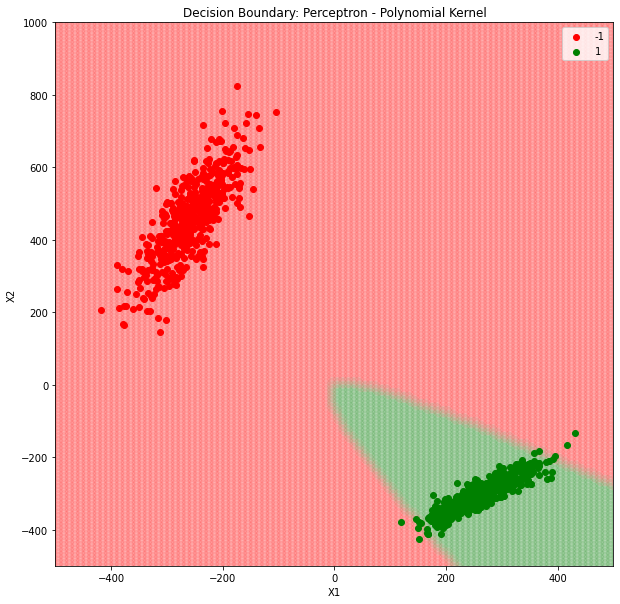

In [22]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_poly_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Polynomial Kernel")

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Tabulating the Results

In [23]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train1 ,accuracy_linear_test1],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train1 ,accuracy_poly_test1]],
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [24]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ Model                       │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99125 │           0.985 │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═════════════════╛


## Dataset 3

In [25]:
data = pd.read_csv('Dataset_3/Dataset_3_Team_24.csv')
data.columns = ['X1','X2','Y']
data.head()

,X1,X2,Y
0,0.556383,-0.249476,1
1,-0.237175,0.534400,1
2,0.182019,-0.968976,0
3,-0.663934,0.777924,0
4,-0.855293,-0.272750,0


In [26]:
X = np.vstack((data[data.columns[0]].values, data[data.columns[1]].values)).T
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

np.random.seed(20)

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]]

### Visualising the data

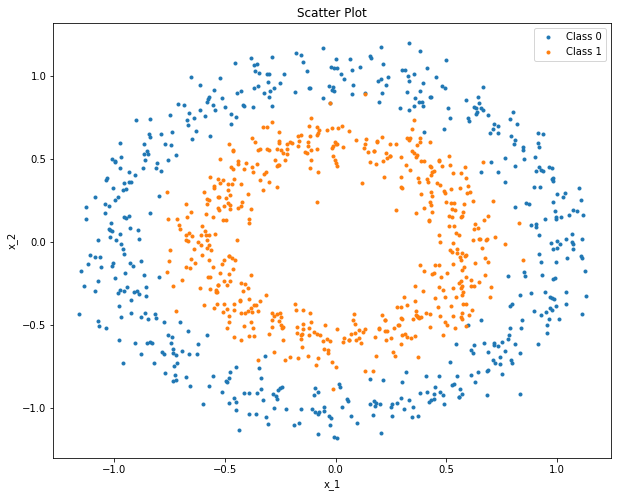

In [27]:
classes = np.unique(Y)

plt.figure(figsize = [10,8])
for c in classes:
    x_c = X[np.argwhere(Y==c).ravel(),:]
    plt.plot(x_c[:,0], x_c[:,1],'.')
    
plt.title('Scatter Plot')
plt.legend(['Class 0','Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show() 

### Linear Kernel 

In [28]:
# Appending with 1s
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [29]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.60875
Epoch: 2, Error: 0.5575
Epoch: 3, Error: 0.49250000000000005
Epoch: 4, Error: 0.495
Epoch: 5, Error: 0.5762499999999999
Epoch: 6, Error: 0.57125
Epoch: 7, Error: 0.495
Epoch: 8, Error: 0.495
Epoch: 9, Error: 0.595
Epoch: 10, Error: 0.5925
Epoch: 11, Error: 0.49875
Epoch: 12, Error: 0.5825
Epoch: 13, Error: 0.49750000000000005
Epoch: 14, Error: 0.495
Epoch: 15, Error: 0.59625
Epoch: 16, Error: 0.585
Epoch: 17, Error: 0.49875
Epoch: 18, Error: 0.49124999999999996
Epoch: 19, Error: 0.61375
Epoch: 20, Error: 0.5825
Epoch: 21, Error: 0.5875
Epoch: 22, Error: 0.5
Epoch: 23, Error: 0.615
Epoch: 24, Error: 0.605
Epoch: 25, Error: 0.6074999999999999
Epoch: 26, Error: 0.5762499999999999
Epoch: 27, Error: 0.49375
Epoch: 28, Error: 0.59375
Epoch: 29, Error: 0.60625
Epoch: 30, Error: 0.61
Epoch: 31, Error: 0.49624999999999997
Epoch: 32, Error: 0.59125
Epoch: 33, Error: 0.61
Epoch: 34, Error: 0.49624999999999997
Epoch: 35, Error: 0.59125
Epoch: 36, Error: 0.60875
Epoch: 37, 

Epoch: 309, Error: 0.49875
Epoch: 310, Error: 0.495
Epoch: 311, Error: 0.5862499999999999
Epoch: 312, Error: 0.56375
Epoch: 313, Error: 0.49875
Epoch: 314, Error: 0.49624999999999997
Epoch: 315, Error: 0.49750000000000005
Epoch: 316, Error: 0.59125
Epoch: 317, Error: 0.5
Epoch: 318, Error: 0.49124999999999996
Epoch: 319, Error: 0.60875
Epoch: 320, Error: 0.59875
Epoch: 321, Error: 0.59375
Epoch: 322, Error: 0.58375
Epoch: 323, Error: 0.49875
Epoch: 324, Error: 0.5900000000000001
Epoch: 325, Error: 0.57375
Epoch: 326, Error: 0.49750000000000005
Epoch: 327, Error: 0.49750000000000005
Epoch: 328, Error: 0.58375
Epoch: 329, Error: 0.59125
Epoch: 330, Error: 0.61
Epoch: 331, Error: 0.54625
Epoch: 332, Error: 0.605
Epoch: 333, Error: 0.58375
Epoch: 334, Error: 0.49875
Epoch: 335, Error: 0.49750000000000005
Epoch: 336, Error: 0.49624999999999997
Epoch: 337, Error: 0.60375
Epoch: 338, Error: 0.49875
Epoch: 339, Error: 0.49
Epoch: 340, Error: 0.495
Epoch: 341, Error: 0.50125
Epoch: 342, Error: 

Epoch: 627, Error: 0.5700000000000001
Epoch: 628, Error: 0.57125
Epoch: 629, Error: 0.5725
Epoch: 630, Error: 0.495
Epoch: 631, Error: 0.49375
Epoch: 632, Error: 0.49875
Epoch: 633, Error: 0.49750000000000005
Epoch: 634, Error: 0.49
Epoch: 635, Error: 0.58375
Epoch: 636, Error: 0.60875
Epoch: 637, Error: 0.58375
Epoch: 638, Error: 0.5974999999999999
Epoch: 639, Error: 0.56875
Epoch: 640, Error: 0.49624999999999997
Epoch: 641, Error: 0.59125
Epoch: 642, Error: 0.5825
Epoch: 643, Error: 0.49750000000000005
Epoch: 644, Error: 0.57875
Epoch: 645, Error: 0.60875
Epoch: 646, Error: 0.49375
Epoch: 647, Error: 0.585
Epoch: 648, Error: 0.49124999999999996
Epoch: 649, Error: 0.58375
Epoch: 650, Error: 0.5762499999999999
Epoch: 651, Error: 0.5800000000000001
Epoch: 652, Error: 0.605
Epoch: 653, Error: 0.58375
Epoch: 654, Error: 0.49875
Epoch: 655, Error: 0.49124999999999996
Epoch: 656, Error: 0.59125
Epoch: 657, Error: 0.5
Epoch: 658, Error: 0.49124999999999996
Epoch: 659, Error: 0.61
Epoch: 660,

Epoch: 941, Error: 0.60375
Epoch: 942, Error: 0.60875
Epoch: 943, Error: 0.57875
Epoch: 944, Error: 0.5875
Epoch: 945, Error: 0.59125
Epoch: 946, Error: 0.49750000000000005
Epoch: 947, Error: 0.49624999999999997
Epoch: 948, Error: 0.605
Epoch: 949, Error: 0.6074999999999999
Epoch: 950, Error: 0.49875
Epoch: 951, Error: 0.585
Epoch: 952, Error: 0.575
Epoch: 953, Error: 0.49750000000000005
Epoch: 954, Error: 0.60875
Epoch: 955, Error: 0.5762499999999999
Epoch: 956, Error: 0.49750000000000005
Epoch: 957, Error: 0.49875
Epoch: 958, Error: 0.49750000000000005
Epoch: 959, Error: 0.49875
Epoch: 960, Error: 0.49124999999999996
Epoch: 961, Error: 0.59125
Epoch: 962, Error: 0.5
Epoch: 963, Error: 0.49124999999999996
Epoch: 964, Error: 0.61
Epoch: 965, Error: 0.59875
Epoch: 966, Error: 0.59375
Epoch: 967, Error: 0.49875
Epoch: 968, Error: 0.49124999999999996
Epoch: 969, Error: 0.59125
Epoch: 970, Error: 0.5
Epoch: 971, Error: 0.49124999999999996
Epoch: 972, Error: 0.61
Epoch: 973, Error: 0.59875


In [30]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a)
Y_test_hat_lin = nn.predict(nn.w, X_test_a)

In [31]:
accuracy_linear_train2 = accuracy(Y_train,Y_train_hat_lin)
accuracy_linear_test2 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_linear_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_linear_test2))

Train Prediction Accuracy: 0.4025
Test Prediction Accuracy: 0.395


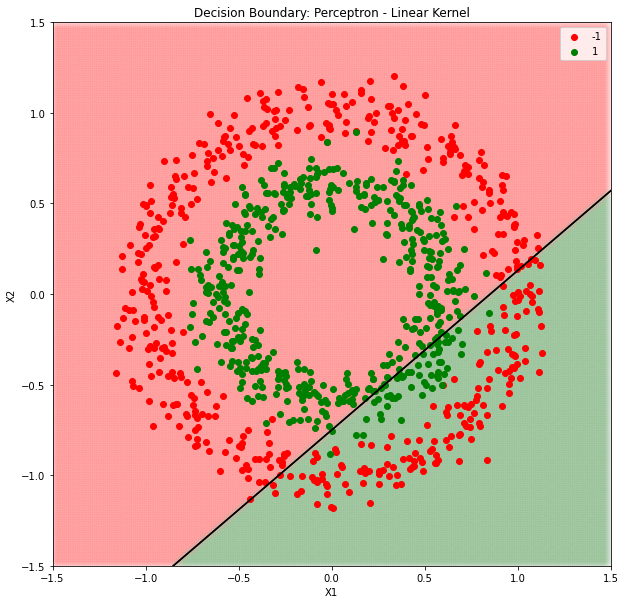

In [32]:
x_l, y_l = nn.line(nn.w, X_train_a)

# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]
x_plot = np.hstack((np.ones(x_plot.shape[0]).reshape(-1,1), x_plot))

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_plot).astype(int)

plt.scatter(x_plot[:,1], x_plot[:,2], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')

for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Linear Kernel")
plt.plot(x_l, y_l, '-k')

plt.xlabel('X1')
plt.ylabel('X2')

plt.plot(x_l, y_l, '-k')


plt.show() 

### Polynomial Kernel

In [33]:
# Generating the polynomial features (Degree =2)
X = data.iloc[:,:2]
Y = data.iloc[:,2:]
X_poly = X.copy()

count = 3

for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        if i == j:
            X_poly['X_{}'.format(count)] = X[X.columns[i]]*X[X.columns[j]]
        else:
            X_poly['X_{}'.format(count)] = np.sqrt(2) * X[X.columns[i]]*X[X.columns[j]]
        count = count + 1

In [34]:
X = X_poly.values
Y = data[data.columns[-1]].values
Y = np.where(Y==0, -1, Y)  # converting class labels 0 to -1 

In [35]:
np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X[order[:train_N],:]
Y_train = Y[order[:train_N]]
X_test = X[order[train_N:],:]
Y_test = Y[order[train_N:]] 

In [36]:
X_train_a = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
X_test_a = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

In [37]:
eta = 0.01         
nn = Perceptron(eta)
nn.train(X_train_a, Y_train)

Epoch: 1, Error: 0.50625
Epoch: 2, Error: 0.03749999999999998
Epoch: 3, Error: 0.01749999999999996
Epoch: 4, Error: 0.016249999999999987
Epoch: 5, Error: 0.01749999999999996
Epoch: 6, Error: 0.011249999999999982
Epoch: 7, Error: 0.015000000000000013
Epoch: 8, Error: 0.015000000000000013
Epoch: 9, Error: 0.015000000000000013
Epoch: 10, Error: 0.018750000000000044
Epoch: 11, Error: 0.016249999999999987
Epoch: 12, Error: 0.016249999999999987
Epoch: 13, Error: 0.01749999999999996
Epoch: 14, Error: 0.012499999999999956
Epoch: 15, Error: 0.015000000000000013
Epoch: 16, Error: 0.01749999999999996
Epoch: 17, Error: 0.01749999999999996
Epoch: 18, Error: 0.015000000000000013
Epoch: 19, Error: 0.015000000000000013
Epoch: 20, Error: 0.016249999999999987
Epoch: 21, Error: 0.01749999999999996
Epoch: 22, Error: 0.01749999999999996
Epoch: 23, Error: 0.01375000000000004
Epoch: 24, Error: 0.018750000000000044
Epoch: 25, Error: 0.01375000000000004
Epoch: 26, Error: 0.01749999999999996
Epoch: 27, Error: 0

Epoch: 263, Error: 0.011249999999999982
Epoch: 264, Error: 0.01375000000000004
Epoch: 265, Error: 0.011249999999999982
Epoch: 266, Error: 0.018750000000000044
Epoch: 267, Error: 0.01749999999999996
Epoch: 268, Error: 0.018750000000000044
Epoch: 269, Error: 0.01749999999999996
Epoch: 270, Error: 0.01749999999999996
Epoch: 271, Error: 0.018750000000000044
Epoch: 272, Error: 0.011249999999999982
Epoch: 273, Error: 0.02375000000000005
Epoch: 274, Error: 0.01749999999999996
Epoch: 275, Error: 0.01749999999999996
Epoch: 276, Error: 0.01375000000000004
Epoch: 277, Error: 0.01375000000000004
Epoch: 278, Error: 0.01749999999999996
Epoch: 279, Error: 0.012499999999999956
Epoch: 280, Error: 0.016249999999999987
Epoch: 281, Error: 0.012499999999999956
Epoch: 282, Error: 0.015000000000000013
Epoch: 283, Error: 0.020000000000000018
Epoch: 284, Error: 0.018750000000000044
Epoch: 285, Error: 0.010000000000000009
Epoch: 286, Error: 0.012499999999999956
Epoch: 287, Error: 0.01375000000000004
Epoch: 288,

Epoch: 473, Error: 0.01749999999999996
Epoch: 474, Error: 0.011249999999999982
Epoch: 475, Error: 0.01749999999999996
Epoch: 476, Error: 0.01749999999999996
Epoch: 477, Error: 0.016249999999999987
Epoch: 478, Error: 0.01749999999999996
Epoch: 479, Error: 0.01749999999999996
Epoch: 480, Error: 0.01375000000000004
Epoch: 481, Error: 0.01749999999999996
Epoch: 482, Error: 0.012499999999999956
Epoch: 483, Error: 0.015000000000000013
Epoch: 484, Error: 0.018750000000000044
Epoch: 485, Error: 0.012499999999999956
Epoch: 486, Error: 0.015000000000000013
Epoch: 487, Error: 0.016249999999999987
Epoch: 488, Error: 0.016249999999999987
Epoch: 489, Error: 0.018750000000000044
Epoch: 490, Error: 0.01749999999999996
Epoch: 491, Error: 0.020000000000000018
Epoch: 492, Error: 0.018750000000000044
Epoch: 493, Error: 0.011249999999999982
Epoch: 494, Error: 0.01749999999999996
Epoch: 495, Error: 0.01375000000000004
Epoch: 496, Error: 0.011249999999999982
Epoch: 497, Error: 0.01749999999999996
Epoch: 498,

Epoch: 713, Error: 0.01749999999999996
Epoch: 714, Error: 0.016249999999999987
Epoch: 715, Error: 0.01375000000000004
Epoch: 716, Error: 0.016249999999999987
Epoch: 717, Error: 0.022499999999999964
Epoch: 718, Error: 0.012499999999999956
Epoch: 719, Error: 0.018750000000000044
Epoch: 720, Error: 0.012499999999999956
Epoch: 721, Error: 0.012499999999999956
Epoch: 722, Error: 0.01375000000000004
Epoch: 723, Error: 0.020000000000000018
Epoch: 724, Error: 0.01749999999999996
Epoch: 725, Error: 0.012499999999999956
Epoch: 726, Error: 0.020000000000000018
Epoch: 727, Error: 0.01375000000000004
Epoch: 728, Error: 0.015000000000000013
Epoch: 729, Error: 0.018750000000000044
Epoch: 730, Error: 0.01375000000000004
Epoch: 731, Error: 0.015000000000000013
Epoch: 732, Error: 0.01375000000000004
Epoch: 733, Error: 0.016249999999999987
Epoch: 734, Error: 0.01375000000000004
Epoch: 735, Error: 0.022499999999999964
Epoch: 736, Error: 0.020000000000000018
Epoch: 737, Error: 0.012499999999999956
Epoch: 7

Epoch: 936, Error: 0.011249999999999982
Epoch: 937, Error: 0.011249999999999982
Epoch: 938, Error: 0.016249999999999987
Epoch: 939, Error: 0.028750000000000053
Epoch: 940, Error: 0.015000000000000013
Epoch: 941, Error: 0.012499999999999956
Epoch: 942, Error: 0.018750000000000044
Epoch: 943, Error: 0.016249999999999987
Epoch: 944, Error: 0.015000000000000013
Epoch: 945, Error: 0.010000000000000009
Epoch: 946, Error: 0.015000000000000013
Epoch: 947, Error: 0.016249999999999987
Epoch: 948, Error: 0.011249999999999982
Epoch: 949, Error: 0.01749999999999996
Epoch: 950, Error: 0.01749999999999996
Epoch: 951, Error: 0.016249999999999987
Epoch: 952, Error: 0.020000000000000018
Epoch: 953, Error: 0.012499999999999956
Epoch: 954, Error: 0.018750000000000044
Epoch: 955, Error: 0.012499999999999956
Epoch: 956, Error: 0.01749999999999996
Epoch: 957, Error: 0.016249999999999987
Epoch: 958, Error: 0.011249999999999982
Epoch: 959, Error: 0.010000000000000009
Epoch: 960, Error: 0.036250000000000004
Epo

In [38]:
Y_train_hat_lin = nn.predict(nn.w, X_train_a).astype(int)
Y_test_hat_lin = nn.predict(nn.w, X_test_a).astype(int)

In [39]:
accuracy_poly_train2 = accuracy(Y_train,Y_train_hat_lin)
accuracy_poly_test2 = accuracy(Y_test,Y_test_hat_lin)
print('Train Prediction Accuracy: {}'.format(accuracy_poly_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_poly_test2))

Train Prediction Accuracy: 0.98125
Test Prediction Accuracy: 0.96


In [40]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X1','X2']
x_poly_plot = x_plot.copy()

count = 3
for i in range(len(x_plot.columns)):
    for j in range(i,len(x_plot.columns)):
        if i == j:
            x_poly_plot['X{}'.format(count)] = x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        else:
            x_poly_plot['X{}'.format(count)] = np.sqrt(2) * x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        count = count + 1
        
x_poly_plot = np.hstack((np.ones(x_poly_plot.shape[0]).reshape(-1,1), x_poly_plot))

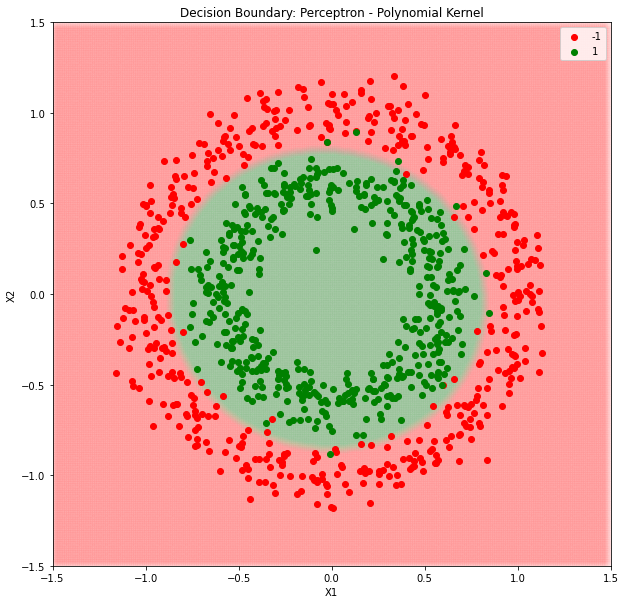

In [41]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {-1: 'red', 1: 'green'}

y_plot = nn.predict(nn.w, x_poly_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)
plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(Y):
    ix = np.where(Y == g)
    plt.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Perceptron - Polynomial Kernel")

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Tabulating the Results

In [42]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train2 ,accuracy_linear_test2],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train2 ,accuracy_poly_test2]],
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [43]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ Model                       │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          0.4025  │           0.395 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.98125 │           0.96  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═════════════════╛


## Comparing both the models with Hard Margin SVMs

### DATASET 1

### Linear Kernel

In [44]:
data = pd.read_csv('Dataset_1/Dataset_1_Team_24.csv')
data.head()
data.columns = ['X1','X2', 'Y']

In [45]:
X = data.drop('Y',axis=1)
y = data['Y']

In [46]:
# Train test split
np.random.seed(20)

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y[order[:train_N]]
X_test = X.loc[order[train_N:],:]
y_test = y[order[train_N:]] 

In [47]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [48]:
model = SVC(C=1000, kernel='linear').fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:
# Getting train and test accuracy
accuracy_svm_train1 = accuracy(y_train, y_train_pred)
accuracy_svm_test1 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train1))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test1))

Train Prediction Accuracy: 1.0
Test Prediction Accuracy: 1.0


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


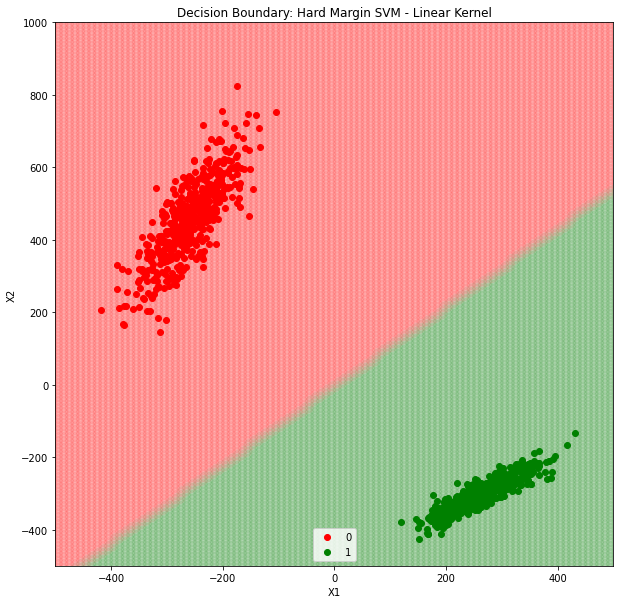

In [50]:
# Plotting the decision boundary

xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Dataset Visualization")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')

for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Hard Margin SVM - Linear Kernel")

# plt.scatter(X.iloc[:,0],X.iloc[:,1], c = pd.Series(y).apply(lambda x: cdict[x]))
# plt.title("Dataset Visualization")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### Polynomial Kernel (Degree = 2)

In [51]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [52]:
model = SVC(C=1000, kernel = 'poly', degree = 2).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
# Getting train and test accuracy
accuracy_svm_train2 = accuracy(y_train, y_train_pred)
accuracy_svm_test2 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train2))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test2))

Train Prediction Accuracy: 0.93125
Test Prediction Accuracy: 0.94


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


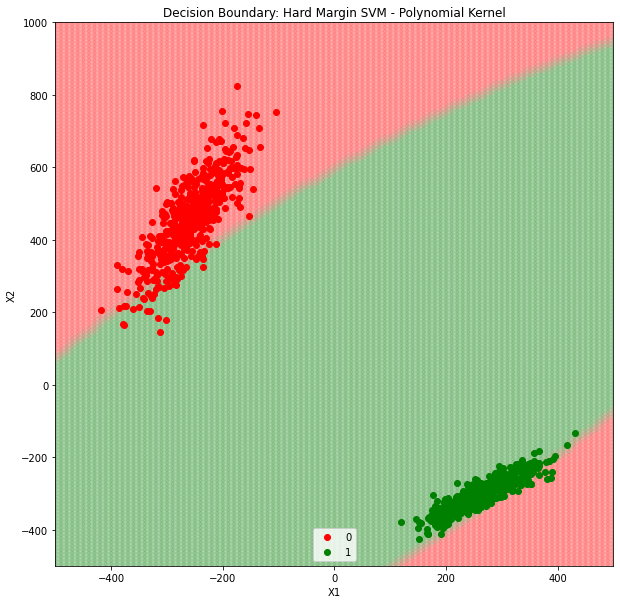

In [54]:
# Plotting the decision boundary

xx, yy = np.meshgrid(np.arange(-600, 600, 10), np.arange(-600, 1100, 10))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =200, alpha=0.05)
plt.title("Decision Boundary: Hard Margin SVM - Polynomial Kernel")
plt.xlim(left=-500, right =500)
plt.ylim(bottom=-500, top =1000)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

### DATASET 3

### Linear Kernel

In [55]:
data = pd.read_csv('Dataset_3/Dataset_3_Team_24.csv')
data.head()
data.columns = ['X1','X2', 'Y']

In [56]:
X = data.drop('Y',axis=1)
y = data['Y']

In [57]:
# Train test split
np.random.seed(20)

N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y[order[:train_N]]
X_test = X.loc[order[train_N:],:]
y_test = y[order[train_N:]] 

In [58]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [59]:
model = SVC(C=1000,kernel='linear').fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [60]:
# Getting train and test accuracy
accuracy_svm_train3 = accuracy(y_train, y_train_pred)
accuracy_svm_test3 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train3))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test3))

Train Prediction Accuracy: 0.53
Test Prediction Accuracy: 0.475


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


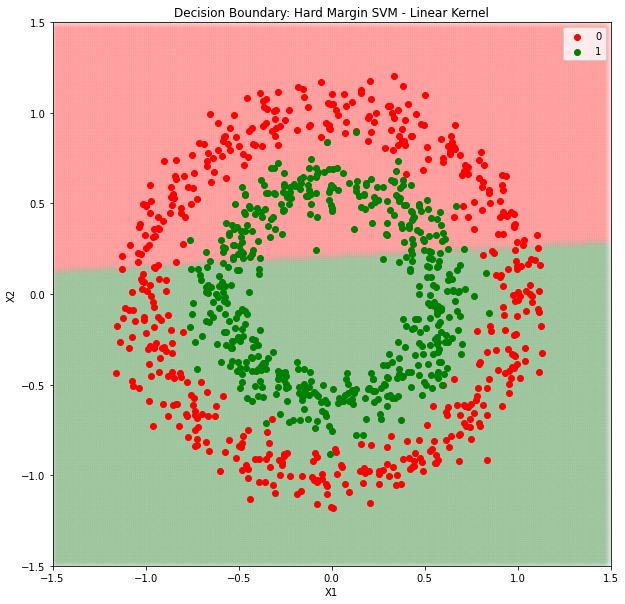

In [61]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Decision Boundary: Hard Margin SVM - Linear Kernel")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')


plt.show() 

### Polynomial Kernel (Degree = 2)

In [62]:
# Since we are using hard margin SVM, we will set C to an extremely large value.

In [63]:
model = SVC(C=1000, kernel = 'poly', degree = 2).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [64]:
# Getting train and test accuracy
accuracy_svm_train4 = accuracy(y_train, y_train_pred)
accuracy_svm_test4 = accuracy(y_test,y_test_pred)
print('Train Prediction Accuracy: {}'.format(accuracy_svm_train4))
print('Test Prediction Accuracy: {}'.format(accuracy_svm_test4))

Train Prediction Accuracy: 0.98875
Test Prediction Accuracy: 0.97


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


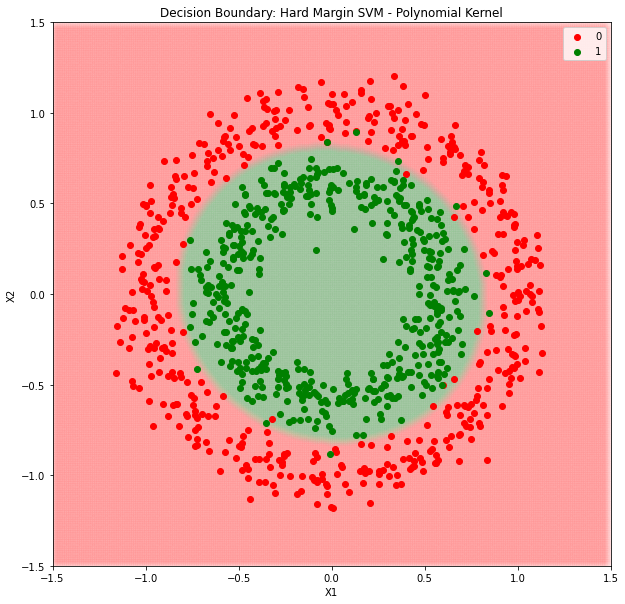

In [65]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = model.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Decision Boundary: Hard Margin SVM - Polynomial Kernel")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')

plt.show() 

### Table of classification accuracy on the train and test data for both the kernels on boththe above datasets

In [66]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train1 ,accuracy_linear_test1],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train1 ,accuracy_poly_test1],
    ['SVM ', 'Linear', accuracy_svm_train1 ,accuracy_svm_test1],
    ['', 'Polynomial', accuracy_svm_train2 ,accuracy_svm_test2]],
    headers= ['DATASET1', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')    

In [67]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ DATASET1                    │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.99125 │           0.985 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│ SVM                         │ Linear               │          1       │           1     │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial           │          0.93125 │           0.94  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═══════

In [68]:
Table = tabulate(
    [['Perceptron Based Classifier', 'Linear', accuracy_linear_train2 ,accuracy_linear_test2],
    ['', 'Polynomial(Degree=2)', accuracy_poly_train2 ,accuracy_poly_test2],
    ['SVM ', 'Linear', accuracy_svm_train3 ,accuracy_svm_test3],
    ['', 'Polynomial', accuracy_svm_train4 ,accuracy_svm_test4]],
    headers= ['DATASET3', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')   

In [69]:
print(Table)

╒═════════════════════════════╤══════════════════════╤══════════════════╤═════════════════╕
│ DATASET3                    │ Kernel               │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════╪══════════════════════╪══════════════════╪═════════════════╡
│ Perceptron Based Classifier │ Linear               │          0.4025  │           0.395 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial(Degree=2) │          0.98125 │           0.96  │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│ SVM                         │ Linear               │          0.53    │           0.475 │
├─────────────────────────────┼──────────────────────┼──────────────────┼─────────────────┤
│                             │ Polynomial           │          0.98875 │           0.97  │
╘═════════════════════════════╧══════════════════════╧══════════════════╧═══════

### Compare the performance of Perceptron for both kernels across the two datasets andexplain your observations.  In particular,  compare the convergence behaviour as afunction of the number of iterations. Compare the number of iterations of Perceptronagainst the theoretical bound.

Please try to fill here

### Interpret your results. Which was the best kernel for each dataset? Why?

From the accuracy scores, we can directly make some conclusions.

Dataset 1 is linearly separable, hence a linear kernel is the best. The linear kernel gives 100% accuracy here, since the datapoints are well seperated as well. The polynomial kernel also works here, but due to the shape of the decision boundary, a few points are misclassified. It also leads to a little amount of overfitting

Dataset 3 is not linearly separable, hence clearly the polynomial kernel is better. Linear kernels perform very poorly here since a straight line cannot classify both the classes.

### Compare the results obtained from Perceptron for both kernels against that of hardmargin SVMs across the two datasets.

Here, we are comparing Perceptron and hard margin SVM. 
Firstly, hard margin SVMs are such that there is a very small margin of classification, hence it tries to make it such that not a single point is misclassified.

Dataset 1 being linearly separable and VERY FAR APART, the hard margin SVM is also able to classify to obtain an accuracy of 100% for both train and test. Again, the fact that both the classes are well separated results in both the models performing easily well (in the case of linear kernels).
In the case of polynomial kernels, the perceptron performs much better since the hard margin SVM takes a very thin margin of separation and hence misclassifies a few points near the boundary.

Dataset 3 is not linearly separable, so the linear kernels perform equally bad in the case of both perceptron and SVM, and there is not much point comparing these since, the classification is altogether incorrect.
In the case of polynomial kernels, the hard margin SVM performs slightly better here, since the points are well separable and the hard margin ensures that very few points are misclassified.